In [2]:
from common.config import Config_IKP
import pandas as pd


robot_names = ["panda", "fetch", "fetch_arm", "atlas_arm", "atlas_waist_arm", "baxter_arm"]

config = Config_IKP()
num_poses = 50
num_sols = 250
df_file_path = lambda robot_name: f"{config.record_dir}/iter_time_{robot_name}_{num_poses}_{num_sols}.csv"

In [1]:
# concat all dataframes into one dataframe
# where new column is robot name
def concatenate_all_dfs(robot_names: list, file_path_function):
    df_list = []
    for robot_name in robot_names:
        df_temp = pd.read_csv(file_path_function(robot_name), index_col=0)
        df_temp["robot_name"] = robot_name
        df_temp.reset_index(drop=True, inplace=True)  # Reset the index
        df_list.append(df_temp)

    df = pd.concat(df_list, ignore_index=True)  # Concatenate all DataFrames
    # robot name is the first column
    df = df[["robot_name"] + [col for col in df.columns if col != "robot_name"]]
    # all number round to 2 decimal places
    df = df.round(2)
    return df
# save to csv
# df = concatenate_all_dfs(robot_names, df_file_path)
# df.to_csv(f"{config.record_dir}/iter_time_all_{num_poses}_{num_sols}.csv")
# df

In [ ]:
# the run_time is a combination of the seed time and the iteration time
# plot the run_time bar diagram with different color for seed time and iteration time for panda robot
# grab the information from df
import matplotlib.pyplot as plt
import seaborn as sns

df_panda = df[df["robot_name"] == "panda"]
df_panda = df_panda[["solver", "seed_time", "iteration_time"]]
df_panda = df_panda.round(2)

# Rename the solvers
df_panda['solver'] = df_panda['solver'].replace({
    'random': 'Random',
    'nsf': 'NSF',
    'paik': 'PAIK'
})

# plot the stacked bar diagram
# x_axis is the solver
# y_axis is the run_time
# the bar is stacked with seed_time and iteration_time

ax = df_panda.set_index("solver").plot(kind="bar", stacked=True, color=["gray", "#d3d3d3"])

# Add hatching to the seed_time bars
bars = ax.patches
hatch_pattern = '//'

for bar in bars[:len(df_panda)]:  # Apply hatch only to the seed_time bars
    bar.set_hatch(hatch_pattern)

# Set x-axis labels and rotation
ax.set_xticklabels(['Random', 'NSF', 'PAIK'], rotation=0)

# Remove the x-axis label
ax.set_xlabel('')

# Change the legend labels
ax.legend(labels=['Seed time', 'Iteration time'])

plt.ylabel("Time (ms)")
plt.title("Runtime for Different Seed for Panda Robot")

# Save the plot
plt.savefig(f"{config.record_dir}/runtime_panda_{num_poses}_{num_sols}.png")
plt.show()

In [3]:
# do the same for ikp   
from common.config import Config_IKP
import pandas as pd

config = Config_IKP()
config.date = "2024_10_17"
num_poses = 1000
num_sols = 1000
stds = [0.01, 0.1, 0.25]

robot_names = ["panda"] # ["panda", "fetch", "fetch_arm", "atlas_arm", "atlas_waist_arm", "baxter_arm"]

solver_names = ["num", "ikflow", "nsf", "paik"]

df_file_path = lambda record_dir, robot_name, num_poses, num_sols, std, solver_name: f"{record_dir}/ikp_{robot_name}_{num_poses}_{num_sols}_{std}_{solver_name}.csv"

df_dict = {}

for std in stds:
    df_dict[std] = {solver_name: pd.read_csv(df_file_path(config.record_dir, "panda", num_poses, num_sols, std, solver_name), index_col=0) for solver_name in solver_names}

# df = concatenate_all_dfs(robot_names, df_file_path)

# Reorder columns to swap mmd and solve_time_ms
# df = df[['robot_name', 'solver', 'mmd', 'l2_mm', 'ang_deg', 'solve_time_ms']]

# df.to_csv(f"{config.record_dir}/ikp_all_{config.num_poses}_{config.num_sols}_{config.std}.csv")
# df

In [ ]:
for std in stds:
    # use df_std to store the mean of each solver
    df_std = pd.DataFrame()
    # df_std only contains the mean of each solver
    for solver_name in solver_names:
        df_std[solver_name] = df_dict[std][solver_name].mean()
    print(f"std: {std}")
    print(df_std)    
    
    # print out the mean of each df

In [ ]:
# do the same for ikp   
from common.config import Config_IKP
import pandas as pd

config = Config_IKP()
config.date = "2024_10_19"
num_poses = 1000
num_sols = 1000
stds = [0.01, 0.05, 0.1, 0.2, 0.25, 0.4]

robot_names = ["panda", "fetch", "fetch_arm"] # ["panda", "fetch", "fetch_arm", "atlas_arm", "atlas_waist_arm", "baxter_arm"]

solver_names = ["num", "ikflow", "nsf_diag_normal", "paik_diag_normal", "nsf_box_uniform", "paik_box_uniform"]	

df_file_path = lambda record_dir, robot_name, num_poses, num_sols, std, solver_name: f"{record_dir}/ikp_{robot_name}_{num_poses}_{num_sols}_{std}_{solver_name}.csv"

df_dict = {}

for std in stds:
    df_dict[std] = {solver_name: pd.read_csv(df_file_path(config.record_dir, "panda", num_poses, num_sols, std, solver_name), index_col=0) for solver_name in solver_names}

for std in stds:
    # use df_std to store the mean of each solver
    df_std = pd.DataFrame()
    # df_std only contains the mean of each solver
    for solver_name in solver_names:
        df_std[solver_name] = df_dict[std][solver_name].mean()
    print(f"std: {std}")
    print(df_std)

In [ ]:
# draw the line plot for each robot
# x-axis is the std
# y-axis is the l2_mm
# each line is a different solver
# the line is colored by the solver
# the line is solid if it is a box_uniform solver
# the line is dashed if it is a diag_normal solver

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# do the same for ikp   
from common.config import Config_IKP
import pandas as pd

config = Config_IKP()
config.date = "2024_10_19"
num_poses = 1000
num_sols = 1000
stds = [0.01, 0.05, 0.1, 0.2, 0.25, 0.4]

robot_names = ["panda", "fetch", "fetch_arm", "atlas_arm", "atlas_waist_arm", "baxter_arm"] # ["panda", "fetch", "fetch_arm", "atlas_arm", "atlas_waist_arm", "baxter_arm"]

solver_names = ["ikflow", "paik_diag_normal", "nsf_diag_normal"]	# ["num", "ikflow", "nsf_diag_normal", "paik_diag_normal", "nsf_box_uniform", "paik_box_uniform"]	

def line_plot_for_robots(robot_names, num_poses, num_sols, stds, solver_names, metric_name):
    # Set the style
    sns.set_style("whitegrid")

    # Set the palette
    palette = sns.color_palette("tab10")

    # Set the markers
    markers = ['o', 's', 'v', 'D', 'X', 'P']

    # Set the linestyles
    linestyles = ['-', '--', '-', '--', '-', '--']

    # Set the x-axis label
    xlabel = 'Standard Deviation'

    # Set the y-axis label
    ylabel = metric_name.replace("_", " ")

    # Set the figure size
    figsize = (8, 12)

    # Create the figure and the axes each row contains 2 plots with total num_solvers plots 
    fig, axs = plt.subplots(len(robot_names), figsize=figsize)

    # Flatten the axes
    axs = axs.flatten()

    legend_labels = {}

    for i, robot_name in enumerate(robot_names):

        df_file_path = lambda record_dir, robot_name, num_poses, num_sols, std, solver_name: f"{record_dir}/ikp_{robot_name}_{num_poses}_{num_sols}_{std}_{solver_name}.csv"

        df_dict = {}

        for std in stds:
            df_dict[std] = {solver_name: pd.read_csv(df_file_path(config.record_dir, robot_name, num_poses, num_sols, std, solver_name), index_col=0) for solver_name in solver_names}

        # Set the title
        title = f'{ylabel} for Different Solvers on {robot_name}'

        ax = axs[i]

        # each line is a different solver
        # the line is colored by the solver
        
        for i, solver_name in enumerate(solver_names):
            x = np.array(stds)
            y = np.array([df_dict[std][solver_name][metric_name].mean() for std in stds])
            yerr = np.array([df_dict[std][solver_name][metric_name].std() for std in stds])

            # Plot the data
            line, = ax.plot(x, y, label=solver_name, color=palette[i], marker=markers[i], linestyle=linestyles[i])
            
            # # Add shaded area
            # ax.fill_between(x, y - yerr, y + yerr, color=palette[i], alpha=0.2)

            if solver_name not in legend_labels:
                legend_labels[solver_name] = line

        # Set the title
        ax.set_title(title)
        
        # Set the y-axis label
        ax.set_ylabel(ylabel)
        
    fig.legend(list(legend_labels.values()), list(legend_labels.keys()), loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)
    
    fig.supxlabel(xlabel)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    # Show the plot
    plt.show()
    
line_plot_for_robots(robot_names, num_poses, num_sols, stds, solver_names, "l2_mm")
line_plot_for_robots(robot_names, num_poses, num_sols, stds, solver_names, "mmd_imq")

In [45]:
# draw the line plot for each robot
# x-axis is the std
# y-axis is the l2_mm
# each line is a different solver
# save the mean of the l2_mm for each solver in a dataframe
# save the mean of the mmd_imq for each solver in a dataframe

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# do the same for ikp   
from common.config import Config_IKP
import pandas as pd

config = Config_IKP()
config.date = "2024_10_19"
num_poses = 1000
num_sols = 1000
stds = [0.01, 0.05, 0.1, 0.2, 0.25, 0.4]

robot_names = ["panda", "fetch", "fetch_arm", "atlas_arm", "atlas_waist_arm", "baxter_arm"] # ["panda", "fetch", "fetch_arm", "atlas_arm", "atlas_waist_arm", "baxter_arm"]

solver_names = ["ikflow", "paik_diag_normal", "nsf_diag_normal"]	# ["num", "ikflow", "nsf_diag_normal", "paik_diag_normal", "nsf_box_uniform", "paik_box_uniform"]

def concatenate_df_mean_for_1_robot_1_solver(robot_name, num_poses, num_sols, stds, solver_name):
    df_file_path = lambda record_dir, robot_name, num_poses, num_sols, std, solver_name: f"{record_dir}/ikp_{robot_name}_{num_poses}_{num_sols}_{std}_{solver_name}.csv"

    records = []
    for std in stds:
        df = pd.read_csv(df_file_path(config.record_dir, robot_name, num_poses, num_sols, std, solver_name), index_col=0)
        mean_values = df.mean().to_dict()
        mean_values.update({"std": std, "robot_name": robot_name, "solver": solver_name})
        records.append(mean_values)
    
    df_stds = pd.DataFrame(records)
    return df_stds

def concatenate_df_mean_for_all_robots(robot_names: list, num_poses, num_sols, stds, solver_names):
    df_list = []
    for robot_name in robot_names:
        for solver_name in solver_names:
            df_temp = concatenate_df_mean_for_1_robot_1_solver(robot_name, num_poses, num_sols, stds, solver_name)
            df_list.append(df_temp)
    df = pd.concat(df_list, ignore_index=True)
    return df
        
robot_name = robot_names[0]
solver_name = solver_names[0]
# df_stds = concatenate_df_mean_for_1_robot_1_solver(robot_name, num_poses, num_sols, stds, solver_name)
df_all = concatenate_df_mean_for_all_robots(robot_names, num_poses, num_sols, stds, solver_names)

In [47]:
df_all.to_csv(f"{config.record_dir}/ikp_all_robot_solver_stds_{num_poses}_{num_sols}.csv")

In [ ]:
import os

# filter the dataframe to only contain the l2_mm and mmd_imq
df = df_all[["robot_name", "solver", "l2_mm", "mmd_imq", "std"]]

def filter_robot(df, robot_name):
    dirctory = f"{config.record_dir}/filtered_robot"
    if not os.path.exists(dirctory):
        os.makedirs(dirctory)
    
    df_robot = df[df["robot_name"] == robot_name]
    # filter std == 0.01, 0.10, 0.25
    df_robot = df_robot[df_robot["std"].isin([0.01, 0.10, 0.25])]
    # remove robot_name column
    df_robot = df_robot.drop(columns=["robot_name"])
    # round to 2 decimal places
    df_robot = df_robot.round(2)
    # solver_name mapping 
    df_robot['solver'] = df_robot['solver'].replace({
        'ikflow': 'IKFlow',
        'paik_diag_normal': 'PAIK',
        'nsf_diag_normal': 'NSF'
    })
    # re-arrange the columns [solver, std, l2_mm, mmd_imq]
    df_robot = df_robot[["solver", "std", "l2_mm", "mmd_imq"]]
    # remove index column
    df_robot.reset_index(drop=True, inplace=True)
    df_robot.to_csv(f"{dirctory}/{robot_name}_l2_mm_mmd_imq_{num_poses}_{num_sols}.csv")
    return df_robot

for robot_name in robot_names:
    df_robot = filter_robot(df, robot_name)
    print(f"Filtered robot: {robot_name}")
    print(df_robot)

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from paik.file import load_pickle

def plot_nsf_linechart(df, hue, x_label, y_labels=['l2_mm', 'mmd_imq'], robot_name='panda'):
    df_cp = df.copy()
    df_cp = df_cp.sort_values(x_label)
    fig, axs = plt.subplots(2, 1, figsize=(10, 12))
    for i, y_label in enumerate(y_labels):
        sns.lineplot(data=df_cp, x=x_label, y=y_label, hue=hue, marker='o', ax=axs[i])
        y_label = y_label.replace('_', ' ').upper()
        axs[i].set_title(f'{robot_name.capitalize()} NSF {y_label} vs {x_label.replace("_", " ").title()}')
        axs[i].set_xlabel(f'{x_label.replace("_", " ").title()}')
        axs[i].set_ylabel(y_label)
        axs[i].grid()
            
    plt.show()

def nested_dict_to_2d_dict(nested_dict: dict):
    ret_dict = {}
    for key, value in nested_dict.items():
        if isinstance(value, dict):
            for k, v in value.items():
                ret_dict[f"{key}_{k}"] = v
        else:
            ret_dict[key] = value
    return ret_dict    
    
def parse_robot_results(record_dir, robot_name, num_poses, num_sols):
    file_path = f'{record_dir}/random_ikp_with_mmd_{robot_name}_{num_poses}_{num_sols}.pkl'
    results = load_pickle(file_path)
    ret_results = nested_dict_to_2d_dict(results)
    df = df = pd.DataFrame(ret_results).T
    # round to 4 decimal places
    df = df.round(4)
    mi = df.index.str.split('_', expand=True)
    df_mi = df.set_index(mi)
    df_mi.reset_index(inplace=True)
    return df_mi

def plot_robot_results(record_dir, robot_name, num_poses, num_sols):
    df_mi = parse_robot_results(record_dir, robot_name, num_poses, num_sols)

    # swap values in the columns of max_samples and num_poses for solver num
    df_mi.loc[df_mi.solver == 'num', ['max_samples', 'num_poses']] = df_mi.loc[df_mi.solver == 'num', ['num_poses', 'max_samples']].values
    # swap values in the columns of radius and num_sols for solver num
    df_mi.loc[df_mi.solver == 'num', ['radius', 'num_sols']] = df_mi.loc[df_mi.solver == 'num', ['num_sols', 'radius']].values

    # set new columns as float 
    df_mi[['max_samples', 'radius', 'num_clusters', 'num_poses', 'num_sols']] = df_mi[['max_samples', 'radius', 'num_clusters', 'num_poses', 'num_sols']].astype(float)

    # filter nsf
    df_nsf = df_mi[df_mi.solver == 'nsf']
    # nsf has variables: max_samples, radius, num_clusters
    # fix the other variables, e.g. num_poses, num_sols.

    # # plot the linechart where x-axis is max_samples, y-axis is mmd_imq
    # # and each line is a different num_clusters. 
    # # Fix radius=0, num_poses=1000, num_sols=1000
    # df_cp = df_nsf.copy()
    # # select the rows where nnum_poses=1000, num_sols=1000, radius=0
    # df_cp = df_cp[(df_cp.num_poses == 1000) & (df_cp.num_sols == 1000) & (df_cp.radius == 0)]
    # plot_nsf_linechart(df_cp, hue='num_clusters', x_label='max_samples', robot_name=robot_name)

    # plot the linechart where x-axis is radius, y-axis is mmd_imq
    # and each line is a different num_clusters. 
    # Fix max_samples=5000000, num_poses=1000, num_sols=1000.
    df_cp = df_nsf.copy()
    # select the rows where nnum_poses=1000, num_sols=1000, max_samples=5000000
    df_cp = df_cp[(df_cp.num_poses == 1000) & (df_cp.num_sols == 1000) & (df_cp.max_samples == 5000000)]
    plot_nsf_linechart(df_cp, hue='num_clusters', x_label='radius', robot_name=robot_name)

    # # plot the linechart where x-axis is max_samples, y-axis is mmd_imq
    # # and each line is a different radius.
    # # Fix num_clusters=25, num_poses=1000, num_sols=1000.
    # df_cp = df_nsf.copy()
    # # select the rows where nnum_poses=1000, num_sols=1000, num_clusters=25
    # df_cp = df_cp[(df_cp.num_poses == 1000) & (df_cp.num_sols == 1000) & (df_cp.num_clusters == 25)]
    # plot_nsf_linechart(df_cp, hue='radius', x_label='max_samples', robot_name=robot_name)

    # # plot the linechart where x-axis is num_poses, y-axis is mmd_imq
    # # and each line is a different num_sols.
    # # Fix max_samples=5000000, radius=0.5, num_clusters=25.
    # df_cp = df_nsf.copy()
    # # select the rows where max_samples=5000000, radius=0.5, num_clusters=25
    # df_cp = df_cp[(df_cp.max_samples == 5000000) & (df_cp.radius == 0.5) & (df_cp.num_clusters == 25)]
    # plot_nsf_linechart(df_cp, hue='num_sols', x_label='num_poses', robot_name=robot_name)

    # # plot two sub-plot linechart where x-axis are max_samples, one y-axis is l2_mm and one is mmd_imq
    # # and each line is a different num_clusters. 
    # # Fix radius=0, num_poses=1000, num_sols=1000.
    # df_cp = df_nsf.copy()
    # # select the rows where nnum_poses=1000, num_sols=1000, radius=0
    # df_cp = df_cp[(df_cp.num_poses == 1000) & (df_cp.num_sols == 1000) & (df_cp.radius == 0)]
    # plot_nsf_linechart(df_cp, hue='num_clusters', x_label='max_samples', robot_name=robot_name)


In [49]:
from common.config import Config_IKP
config = Config_IKP()
config.date = "2024_11_06"
config.workdir = '/mnt/d/pads/Documents/paik_store'
df_mi = parse_robot_results(config.record_dir, 'panda', 1000, 1000)
# plot_robot_results(config.record_dir, 'atlas_arm', 1000, 1000)
df_mi.to_csv(f"{config.record_dir}/panda_1000_1000.csv")

In [51]:
df = pd.read_csv(f"{config.record_dir}/panda_1000_1000.csv", index_col=0)
df

,solver,method,std,#samples,#clusters,#poses,#sols,l2_mm,ang_deg,num_sols_time_ms,mmd_guassian,mmd_imq
0,num,NaN,NaN,NaN,NaN,1000,1000,0.4220,0.0517,550,NaN,NaN
1,paik,gaussian,0.001,NaN,NaN,1000,1000,3.9967,2.3483,73,0.1096,0.0842
2,paik,gaussian,0.100,NaN,NaN,1000,1000,4.0637,2.3867,74,0.0963,0.0737
3,paik,gaussian,0.250,NaN,NaN,1000,1000,4.1664,2.4390,74,0.0782,0.0602
4,paik,gaussian,0.500,NaN,NaN,1000,1000,4.6991,2.6983,74,0.0578,0.0455
5,paik,gaussian,0.700,NaN,NaN,1000,1000,5.4719,3.0565,73,0.0484,0.0386
6,nsf,gaussian,0.001,NaN,NaN,1000,1000,2.8901,2.0413,73,0.8618,0.6399
7,nsf,gaussian,0.100,NaN,NaN,1000,1000,2.9745,1.8645,74,0.4075,0.2958
8,nsf,gaussian,0.250,NaN,NaN,1000,1000,3.2137,1.9092,73,0.1540,0.1151
9,nsf,gaussian,0.500,NaN,NaN,1000,1000,3.7233,2.0861,78,0.0568,0.0439


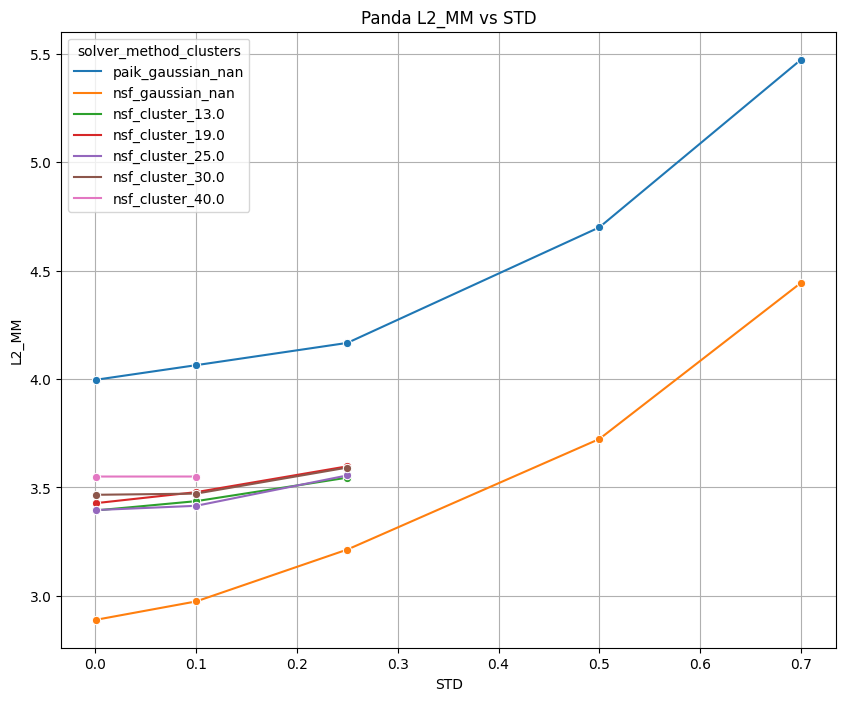

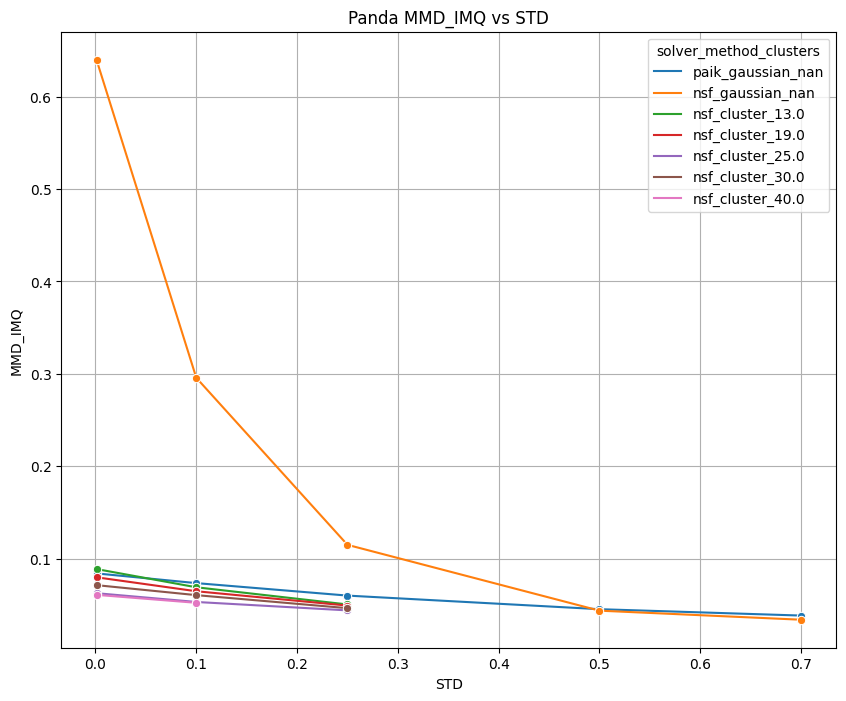

In [61]:
df_cp = df.copy()
# drop #samples, #poses, #sols columnes 
df_cp = df_cp.drop(columns=['#samples', '#poses', '#sols', 'mmd_guassian', "ang_deg"])
# drop num row 
df_cp = df_cp[df_cp.solver != 'num']
df_cp
# plot a linechart where x-axis is the std
# y-axis is the l2_mm 
# each line is a different f"{solver}_{method}_{#clusters}"



# a new column whose name is f"{solver}_{method}_{#clusters}"
df_cp['solver_method_clusters'] = df_cp['solver'] + '_' + df_cp['method'] + '_' + df_cp['#clusters'].astype(str)
# remove the solver, method, #clusters columns
df_cp = df_cp.drop(columns=['solver', 'method', '#clusters'])
df_cp

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

# plot the linechart where x-axis is the std
# y-axis is the l2_mm
# each line is a different f"{solver}_{method}_{#clusters}"
file_path = f"{config.record_dir}/panda_1000_1000_l2_mm.png"
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=df_cp, x='std', y='l2_mm', hue='solver_method_clusters', marker='o', ax=ax)
ax.set_title('Panda L2_MM vs STD')
ax.set_xlabel('STD')
ax.set_ylabel('L2_MM')
ax.grid()
plt.savefig(file_path)
plt.show()

# plot a linechart where x-axis is the std
# y-axis is the mmd_imq
# each line is a different f"{solver}_{method}_{#clusters}"
file_path = f"{config.record_dir}/panda_1000_1000_mmd_imq.png"
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=df_cp, x='std', y='mmd_imq', hue='solver_method_clusters', marker='o', ax=ax)
ax.set_title('Panda MMD_IMQ vs STD')
ax.set_xlabel('STD')
ax.set_ylabel('MMD_IMQ')
ax.grid()
plt.savefig(file_path)
plt.show()


WorldModel::LoadRobot: /home/luca/.cache/jrl/temp_urdfs/panda_arm_hand_formatted_link_filepaths_absolute.urdf
joint mimic: no multiplier, using default value of 1 
joint mimic: no offset, using default value of 0 
URDFParser: Link size: 17
URDFParser: Joint size: 12
LoadAssimp: Loaded model /home/luca/miniconda3/lib/python3.9/site-packages/jrl/urdfs/panda/meshes/visual/link0.dae (59388 verts, 20478 tris)
LoadAssimp: Loaded model /home/luca/miniconda3/lib/python3.9/site-packages/jrl/urdfs/panda/meshes/visual/link1.dae (37309 verts, 12516 tris)
LoadAssimp: Loaded model /home/luca/miniconda3/lib/python3.9/site-packages/jrl/urdfs/panda/meshes/visual/link2.dae (37892 verts, 12716 tris)
LoadAssimp: Loaded model /home/luca/miniconda3/lib/python3.9/site-packages/jrl/urdfs/panda/meshes/visual/link3.dae (42512 verts, 14233 tris)
LoadAssimp: Loaded model /home/luca/miniconda3/lib/python3.9/site-packages/jrl/urdfs/panda/meshes/visual/link4.dae (43520 verts, 14620 tris)
LoadAssimp: Loaded model /ho

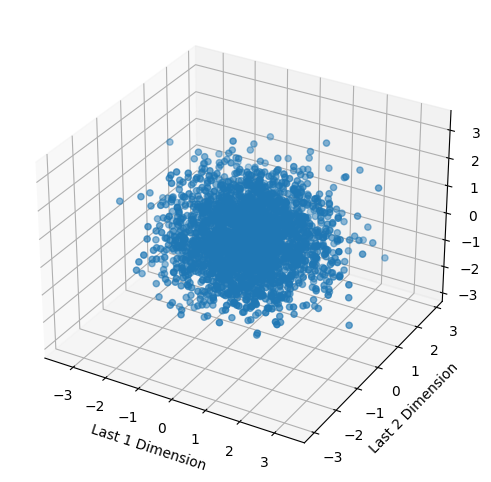

Scatter plot saved at /mnt/d/pads/Documents/paik_store/record/2024_11_04/panda_nsf_all_latents_scatter_5000_47_1.png


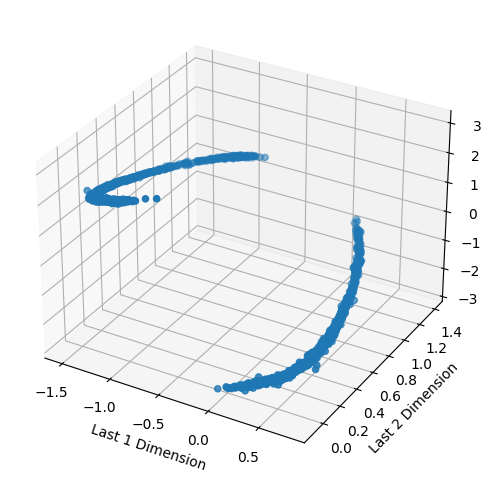

Scatter plot saved at /mnt/d/pads/Documents/paik_store/record/2024_11_04/panda_nsf_all_ik_sols_scatter_5000_47_1.png
l2_mm=1.4918603423548247, ang_deg=1.0497866734503711
valid_idx=5000


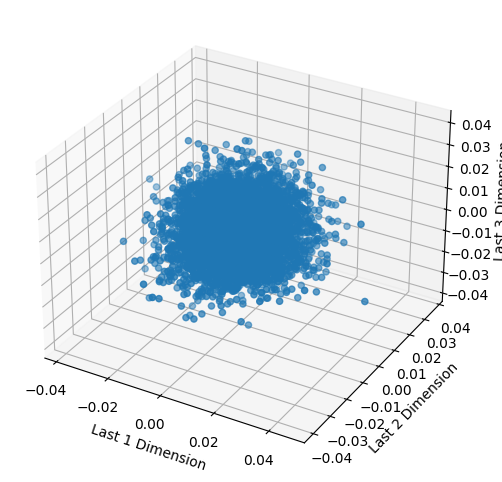

Scatter plot saved at /mnt/d/pads/Documents/paik_store/record/2024_11_04/panda_nsf_all_latents_scatter_5000_47_0.01.png


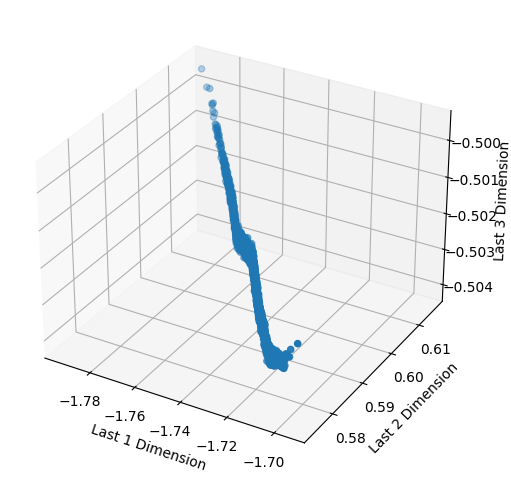

Scatter plot saved at /mnt/d/pads/Documents/paik_store/record/2024_11_04/panda_nsf_all_ik_sols_scatter_5000_47_0.01.png


In [37]:
import numpy as np
import torch
import pandas as pd
from paik.solver import NSF, get_solver
from common.evaluate import evaluate_pose_error_J3d_P2d
from common.config import Config_IKP
from ikp import numerical_inverse_kinematics_batch

# set the same random seed for reproducibility
random_seed = 47
np.random.seed(random_seed)
torch.manual_seed(random_seed)

robot_name = "panda"
nsf = get_solver(arch_name="nsf", robot_name=robot_name, load=True, work_dir='/home/luca/paik')

# plot the scatter of nsf.Z for the last three dimensions
# x-axis is the second last dimension
# y-axis is the last dimension
# z-axis is the first dimension

import matplotlib.pyplot as plt
import seaborn as sns

def plot_3d_scatter(array, file_path):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(array[:, -1], array[:, -2], array[:, -3])
    ax.set_xlabel('Last 1 Dimension')
    ax.set_ylabel('Last 2 Dimension')
    ax.set_zlabel('Last 3 Dimension')
    plt.savefig(file_path)
    plt.show()
    
def plot_nsf_Guassian_scatter(nsf: NSF, robot_name, max_samples=1000, std=1):
    random_sol, random_pose  = nsf.robot.sample_joint_angles_and_poses(1)
    random_latents = np.random.randn(max_samples, 1, nsf.n) * std
    
    ik_sols = nsf.generate_ik_solutions_z(random_pose, random_latents)
    ik_sols = ik_sols.reshape(len(random_latents), -1, nsf.n)

    l2, ang = evaluate_pose_error_J3d_P2d(
        # input J.shape = (num_sols, num_poses, num_dofs or n)
        nsf.robot, ik_sols, random_pose, return_all=True
    )
    l2_mm = l2[~np.isnan(l2)] * 1000
    ang_deg = np.rad2deg(ang[~np.isnan(ang)])
    print(f"l2_mm={l2_mm.mean()}, ang_deg={ang_deg.mean()}")

    valid_idx = l2_mm < 4
    print(f"valid_idx={valid_idx.sum()}")
    random_latents = random_latents[valid_idx].reshape(-1, nsf.n)
    # random_latents = random_latents.reshape(-1, nsf.n)
    
    # plot and save the scatter plot
    file_path = f"{config.record_dir}/{robot_name}_nsf_all_latents_scatter_{max_samples}_{random_seed}_{std}.png"
    plot_3d_scatter(random_latents, file_path)
    print(f"Scatter plot saved at {file_path}")
    
    # plot and save the scatter plot of ik_sols for the last three dimensions
    # x-axis is the second last dimension
    # y-axis is the last dimension
    # z-axis is the first dimension
    ik_sols = ik_sols[valid_idx].reshape(-1, nsf.n)
    # ik_sols = ik_sols.reshape(-1, nsf.n)
    file_path = f"{config.record_dir}/{robot_name}_nsf_all_ik_sols_scatter_{max_samples}_{random_seed}_{std}.png"
    plot_3d_scatter(ik_sols, file_path)
    print(f"Scatter plot saved at {file_path}")
    

def plot_nsf_Z_scatter(nsf: NSF, robot_name, max_samples=1000):
    random_sol, random_pose  = nsf.robot.sample_joint_angles_and_poses(1)
    random_pose = random_pose.reshape(1, -1)
    ik_sols_num = numerical_inverse_kinematics_batch(nsf, random_pose, num_sols=max_samples)
    random_latents = nsf.generate_z_from_ik_solutions(random_pose, ik_sols_num)
    random_latents = random_latents.reshape(max_samples, 1, nsf.n)

    ik_sols = nsf.generate_ik_solutions_z(random_pose, random_latents)
    ik_sols = ik_sols.reshape(len(random_latents), -1, nsf.n)

    l2, ang = evaluate_pose_error_J3d_P2d(
        # input J.shape = (num_sols, num_poses, num_dofs or n)
        nsf.robot, ik_sols, random_pose, return_all=True
    )
    l2_mm = l2[~np.isnan(l2)] * 1000
    ang_deg = np.rad2deg(ang[~np.isnan(ang)])
    print(f"l2_mm={l2_mm.mean()}, ang_deg={ang_deg.mean()}")

    valid_idx = l2_mm < 4
    print(f"valid_idx={valid_idx.sum()}")
    random_latents = random_latents[valid_idx].reshape(-1, nsf.n)
    # random_latents = random_latents.reshape(-1, nsf.n)
    
    # plot and save the scatter plot
    file_path = f"{config.record_dir}/{robot_name}_nsf_all_latents_scatter_{max_samples}_{random_seed}.png"
    plot_3d_scatter(random_latents, file_path)
    print(f"Scatter plot saved at {file_path}")
    
    # plot and save the scatter plot of ik_sols for the last three dimensions
    # x-axis is the second last dimension
    # y-axis is the last dimension
    # z-axis is the first dimension
    ik_sols = ik_sols[valid_idx].reshape(-1, nsf.n)
    # ik_sols = ik_sols.reshape(-1, nsf.n)
    file_path = f"{config.record_dir}/{robot_name}_nsf_all_ik_sols_scatter_{max_samples}_{random_seed}.png"
    plot_3d_scatter(ik_sols, file_path)
    print(f"Scatter plot saved at {file_path}")
    
config = Config_IKP()
config.date = "2024_11_04"
config.workdir = '/mnt/d/pads/Documents/paik_store'
max_samples = 5000
# plot_nsf_Z_scatter(nsf, robot_name, max_samples)
plot_nsf_Guassian_scatter(nsf, robot_name, max_samples, std=1)
plot_nsf_Guassian_scatter(nsf, robot_name, max_samples, std=0.01)

Start to initialize cluster info...


  0%|          | 0/1 [00:00<?, ?it/s]

latents.shape=(30, 7)


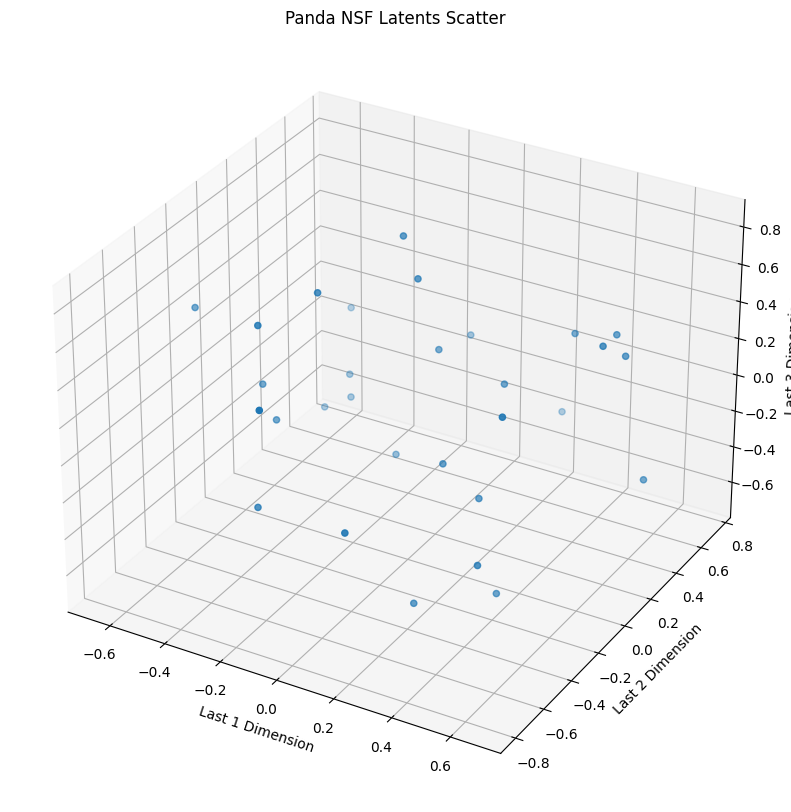

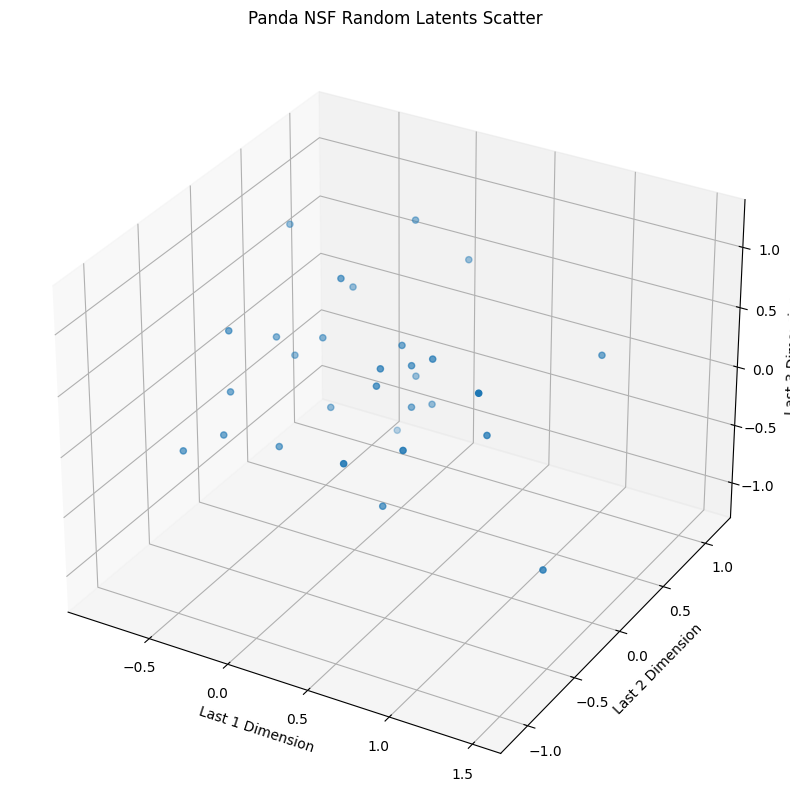

In [32]:
from typing import Optional
from sklearn.cluster import BisectingKMeans
from sklearn.neighbors import NearestNeighbors
from tqdm.contrib import itertools as tqdm_itertools


class Retriever:
    def __init__(self, nsf: NSF):
        
        self.P_all = nsf.P
        self.Z_all = nsf.Z
        self.J_all = nsf.J
        
        self.temp_cluster_info = {}
        
    def init_cluster_info(self, max_samples_list: int, n_clusters_list: int):
        print("Start to initialize cluster info...")
        for max_samples, n_clusters in tqdm_itertools.product(max_samples_list, n_clusters_list):
            self.get_cluster_info(max_samples, n_clusters)
    
    def get_cluster_info(self, max_samples: int, n_clusters: int):
        if f"{max_samples}_{n_clusters}" in self.temp_cluster_info:
            return self.temp_cluster_info[f"{max_samples}_{n_clusters}"]['centroids_ids']

        Z_samples = self.Z_all[:max_samples]
        # buliding the clustering    
        cluster = BisectingKMeans(n_clusters=n_clusters, random_state=0).fit(Z_samples)
        centroids = cluster.cluster_centers_
        # find centroids ids in Z_samples
        Z_samples_knn = NearestNeighbors(n_neighbors=1).fit(Z_samples)
        centroids_ids = Z_samples_knn.kneighbors(centroids, return_distance=False).flatten()
        self.temp_cluster_info[f"{max_samples}_{n_clusters}"] = {
            'centroids_ids': centroids_ids
        }
        return centroids_ids

    def cluster_retriever(self, J: Optional[np.ndarray] = None, num_poses: int = 1, num_sols: int = 1, max_samples: int = 50000, radius: float = 0, n_clusters: int = 100):
        Z_samples = self.Z_all[:max_samples]
        J_samples = self.J_all[:max_samples]

        centroids_ids = self.get_cluster_info(max_samples, n_clusters)
        num_total = num_sols * num_poses

        # diversity 
        if J is None:
            ids = np.random.choice(centroids_ids, num_total, replace=True)
        # selection
        else:
            # weight sampling based on the distance to the centroids
            J_centroid = J_samples[centroids_ids] # shape: (num_centroids, nsf.n)

            ids = np.empty((num_sols, num_poses), dtype=int)
            for i in range(len(J)):
                J_i = J[i]
                dist = np.linalg.norm(J_centroid - J_i, axis=-1)
                inv_dist = 1 / dist
                # prob for each centroid based on the 1/dist
                prob = inv_dist / inv_dist.sum()
                ids[:, i] = np.random.choice(centroids_ids, num_sols, replace=True, p=prob)
                # shuffle the ids
                ids[:, i] = np.random.permutation(ids[:, i])
            # shape: (num_sols, num_poses)  -> shape: (num_sols * num_poses)  
            ids = ids.flatten()
        Z_out = Z_samples[ids]
        noise = np.random.normal(0, radius, size=Z_out.shape)
        return Z_out + noise
    
    def random_retriever(self, J: Optional[np.ndarray] = None, num_poses: int = 1, num_sols: int = 1, max_samples: int = 1000, radius: float = 0):
        print("Start to random retriever...")
        # diversity
        if J is None:
            ids = np.random.choice(max_samples, num_sols * num_poses, replace=True)
        # selection
        else:
            J_knn = NearestNeighbors(n_neighbors=num_sols).fit(self.J_all[:max_samples])
            ids = J_knn.kneighbors(J, return_distance=False)
            # shape: (num_poses, num_sols) -> shape: (num_sols, num_poses)  -> shape: (num_sols * num_poses)  
            ids = ids.T.flatten()
        Z_out = self.Z_all[ids]
        noise = np.random.normal(0, radius, size=Z_out.shape)
        return Z_out + noise
    
retriever = Retriever(nsf)
retriever.init_cluster_info(max_samples_list=[500000], n_clusters_list=[30])
ids = retriever.get_cluster_info(500000, 30)
latents = nsf.Z[ids]
plot_3d_scatter(latents, f"{config.record_dir}/{robot_name}_nsf_cluster_latents_scatter_{max_samples}_{random_seed}.png")

# plot the scatter of random latents for the last three dimensions
random_latents = nsf.Z[:len(ids)]
plot_3d_scatter(random_latents, f"{config.record_dir}/{robot_name}_nsf_random_latents_scatter_{max_samples}_{random_seed}.png")

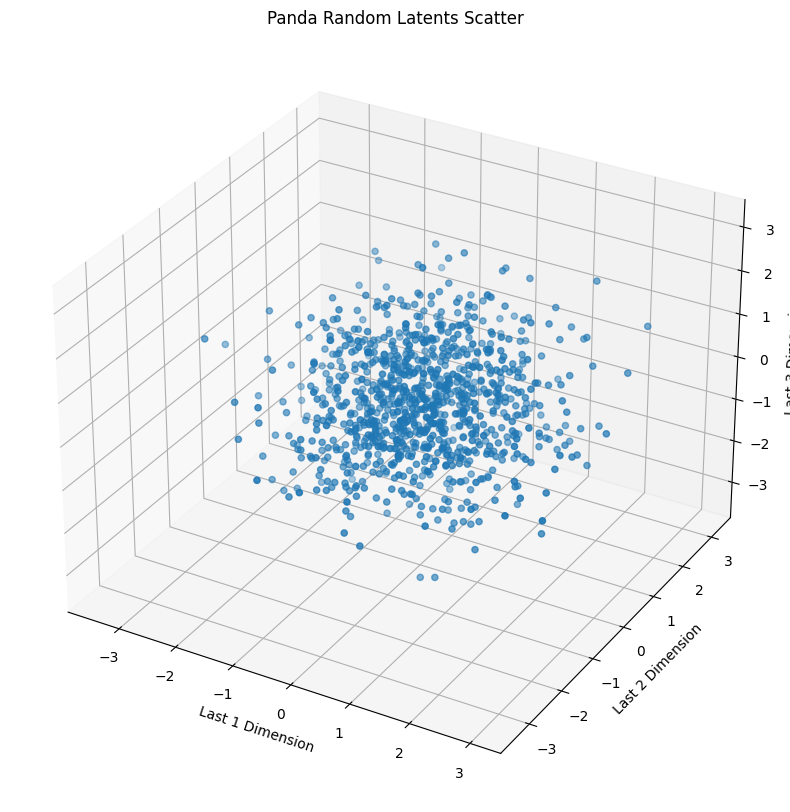

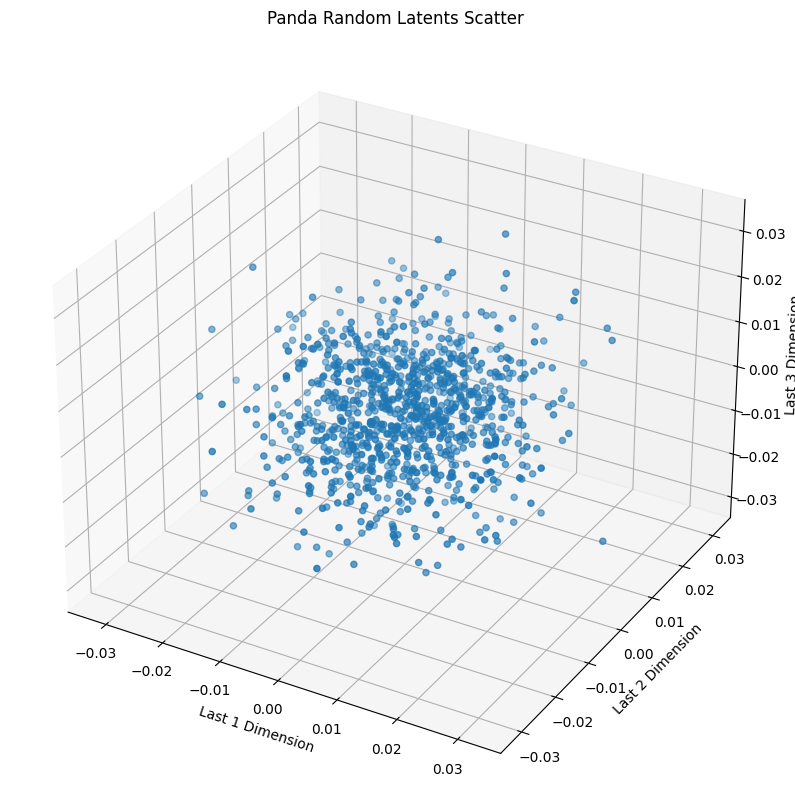

In [33]:
latent = np.random.randn(1000, nsf.n)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(latent[:, -2], latent[:, -1], latent[:, 0])
ax.set_xlabel('Last 1 Dimension')
ax.set_ylabel('Last 2 Dimension')
ax.set_zlabel('Last 3 Dimension')
ax.set_title(f'{robot_name.capitalize()} Random Latents Scatter')
file_path = f"{config.record_dir}/{robot_name}_guassian_latents_scatter_{max_samples}_{random_seed}.png"
plt.savefig(file_path)
plt.show()

std = 0.01
latent = np.random.randn(1000, nsf.n) * std
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(latent[:, -2], latent[:, -1], latent[:, 0])
ax.set_xlabel('Last 1 Dimension')
ax.set_ylabel('Last 2 Dimension')
ax.set_zlabel('Last 3 Dimension')
ax.set_title(f'{robot_name.capitalize()} Random Latents Scatter')
file_path = f"{config.record_dir}/{robot_name}_guassian_latents_scatter_{std}_{max_samples}_{random_seed}.png"
plt.savefig(file_path)
plt.show()